# Displaying Data
By Gabe Wilberscheid

It is just as important that you are able to well define and express your findings as a data scientist as finding the data and insights in the first place. Here are a list of tools and some of their most useful functions and methods for data science.

In [31]:
# when working in Juyter it is important to dsiplay inline
# thats what this call does using Jupyter's magic fucntions
%matplotlib inline

# Matplotlib.pyplot

The most used and basic visualization tool in python data science. Able to graph simple and complex data, however this package is rather low level and will require more code to write and convay complex data. 

"Matplotlib is designed with the philosophy that you should be able to create simple plots with just a few commands, or just one! If you want to see a histogram of your data, you shouldn’t need to instantiate objects, call methods, set properties, and so on; it should just work."
https://matplotlib.org/users/pyplot_tutorial.html

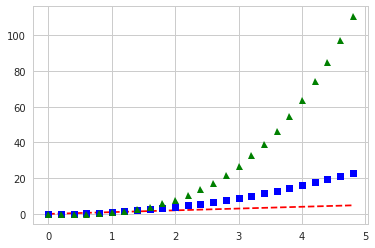

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
# plt.plot(x-values, y-values, args for style and color)
plt.show()

# Seaborn
Seaborn is built on top of matplotlib, but adds more features and better looking defualts. As well as makes more complex graphs easier to manage.
https://seaborn.pydata.org/

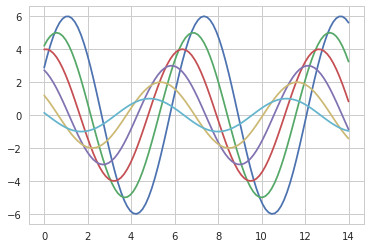

In [33]:
import seaborn as sns
# pick a seed in random for reproduceable results
np.random.seed(sum(map(ord, "aesthetics")))
# a function to create some aesthetic lines to plot
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)
# defualt style matplotlib
sinplot()

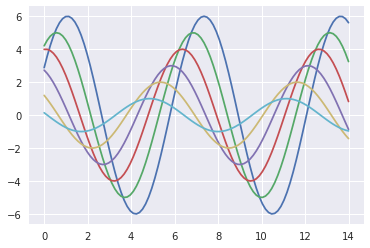

In [34]:
# to set default for seaborn call set() function
sns.set()
sinplot()

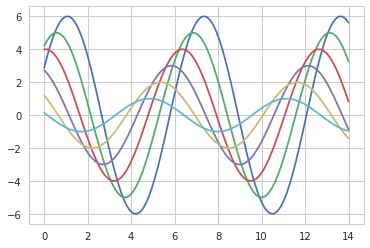

In [35]:
# There are five preset seaborn themes: darkgrid, whitegrid, dark, white, and ticks
sns.set_style('whitegrid')
sinplot()

Seaborn really shines once your data gets more complex and you need ways to keep viewers intrested in certain statitics and findings.

# Plotly
### "D3.js charts and maps for Python, MATLAB, R and more. "
We will only be using python, here are some of the best usecase for Plotly with code on their website.
https://plot.ly/python/

In [36]:
import plotly.plotly as py
import plotly
import plotly.figure_factory as ff
import geopandas
import shapely
import numpy as np
import pandas as pd

plotly.tools.set_credentials_file(username='wilber-guy', api_key='VfFPU769cnQLsITMQZ1v')

df_sample = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/minoritymajority.csv')
df_sample_r = df_sample[df_sample['STNAME'] == 'North Dakota']

values = df_sample_r['TOT_POP'].tolist()
fips = df_sample_r['FIPS'].tolist()

colorscale = [
    'rgb(193, 193, 193)',
    'rgb(239,239,239)',
    'rgb(195, 196, 222)',
    'rgb(144,148,194)',
    'rgb(101,104,168)',
    'rgb(65, 53, 132)'
]

fig = ff.create_choropleth(
    fips=fips, values=values, scope=['ND'],
    binning_endpoints=[14348, 63983, 134827, 426762, 2081313], colorscale=colorscale,
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.3}, round_legend_values=True,
    legend_title='Population by County', title='North Dakota Population'
)
py.iplot(fig, filename='choropleth_north_dakota')

A note about plotly is that it is a primarly a web based tool, but as you can see you can also plot direcrtly in Jupyter notebooks.

In [37]:
import plotly.graph_objs as go

# Read data from a csv
z_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv')

data = [
    go.Surface(
        z=z_data.as_matrix()
    )
]
layout = go.Layout(
    title='Mt Bruno Elevation',
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=65,
        r=50,
        b=65,
        t=90
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='elevations-3d-surface')

## Summary
As you can see displaying data can be very simple, with matplotlib or you can work with highly complex data using libaries like plotly to show interactive data in new and compeling ways. As a data scientist half of the job requires you to inform others about your finding, and there is no better way to do that than a pretty graph!